In [1]:
!wget -N https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
!wget -N https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip
!unzip -o dogImages.zip
!unzip -o lfw.zip

!mv dogImages dog_images

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: lfw/Steffi_Graf/Steffi_Graf_0003.jpg  
  inflating: __MACOSX/lfw/Steffi_Graf/._Steffi_Graf_0003.jpg  
  inflating: lfw/Steffi_Graf/Steffi_Graf_0004.jpg  
  inflating: __MACOSX/lfw/Steffi_Graf/._Steffi_Graf_0004.jpg  
  inflating: lfw/Steffi_Graf/Steffi_Graf_0005.jpg  
  inflating: __MACOSX/lfw/Steffi_Graf/._Steffi_Graf_0005.jpg  
  inflating: __MACOSX/lfw/._Steffi_Graf  
   creating: lfw/Stella_Keitel/
  inflating: lfw/Stella_Keitel/Stella_Keitel_0001.jpg  
   creating: __MACOSX/lfw/Stella_Keitel/
  inflating: __MACOSX/lfw/Stella_Keitel/._Stella_Keitel_0001.jpg  
  inflating: __MACOSX/lfw/._Stella_Keitel  
   creating: lfw/Stella_McCartney/
  inflating: lfw/Stella_McCartney/Stella_McCartney_0001.jpg  
   creating: __MACOSX/lfw/Stella_McCartney/
  inflating: __MACOSX/lfw/Stella_McCartney/._Stella_McCartney_0001.jpg  
  inflating: __MACOSX/lfw/._Stella_McCartney  
   creating: lfw/Stella_Tennant/
  inflating: lfw/S

In [2]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


In [0]:
import PIL
import numpy as np
import torch
import torchvision

import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['axes.grid'] = False
mpl.rcParams['image.interpolation'] = 'nearest'
mpl.rcParams['figure.figsize'] = 15, 25

def show_dataset(dataset, n=6):
  img = np.vstack((np.hstack((np.asarray(dataset[i][0]) for _ in range(n)))
                   for i in range(n)))
  plt.imshow(img)
  plt.axis('off')

In [0]:
import torchvision.transforms as transforms

train_transforms = transforms.Compose([
                                       transforms.Resize(258),
                                       transforms.ColorJitter(hue=.05, saturation=.05),
                                       transforms.RandomHorizontalFlip(),
                                       torchvision.transforms.RandomRotation(20, resample=PIL.Image.BILINEAR),
                                       transforms.CenterCrop(224)
                                       ])


dataset = torchvision.datasets.ImageFolder('/content/dog_images/train', transform=train_transforms)

#show_dataset(dataset)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  app.launch_new_instance()


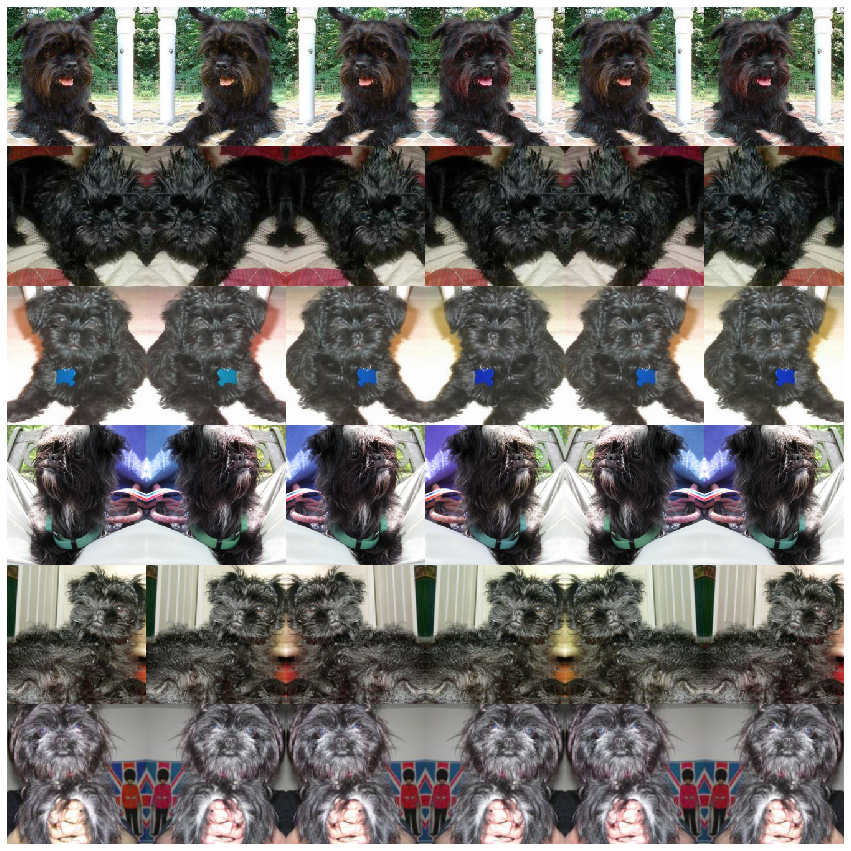

In [33]:
show_dataset(dataset)

In [0]:
#!pip install git+https://github.com/aleju/imgaug
from imgaug import augmenters as iaa
import imgaug as ia

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Function `Scale()` is deprecated. Use `Resize` instead. Resize has the exactly same interface as Scale.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  app.launch_new_instance()


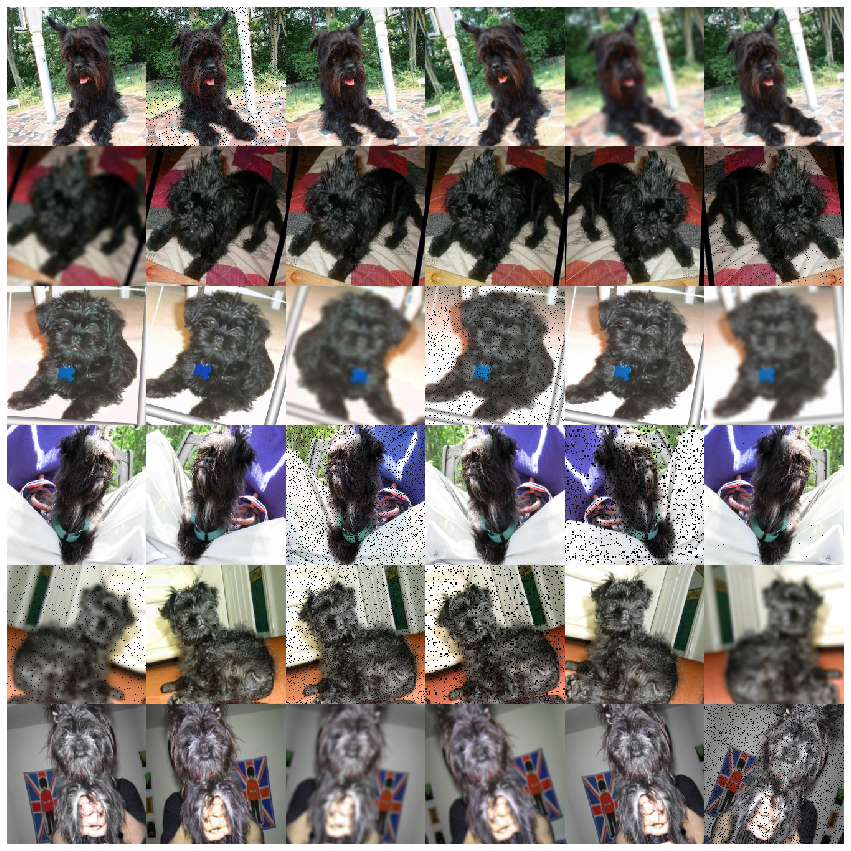

In [35]:
class ImgAugTransform:
  def __init__(self):
    self.aug = iaa.Sequential([
        iaa.Scale((224, 224)),
        iaa.Sometimes(0.25, iaa.GaussianBlur(sigma=(0, 3.0))),
        iaa.Fliplr(0.5),
        iaa.Affine(rotate=(-20, 20), mode='symmetric'),
        iaa.Sometimes(0.25,
                      iaa.OneOf([iaa.Dropout(p=(0, 0.1)),
                                 iaa.CoarseDropout(0.1, size_percent=0.5)])),
        iaa.AddToHueAndSaturation(value=(-10, 10), per_channel=True)
    ])
      
  def __call__(self, img):
    img = np.array(img)
    return self.aug.augment_image(img)

transforms = ImgAugTransform()

dataset = torchvision.datasets.ImageFolder('/content/dog_images/train', transform=transforms)


show_dataset(dataset)

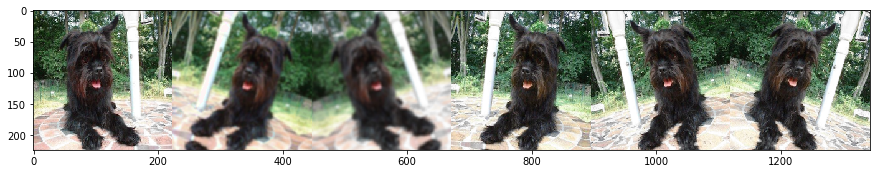

In [36]:
aug = iaa.Affine(rotate=(-40, 40), mode='symmetric')
imgs = [np.asarray(dataset[0][0]) for _ in range(6)]
aug.augment_images(imgs)
plt.imshow(np.hstack(imgs))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Function `Scale()` is deprecated. Use `Resize` instead. Resize has the exactly same interface as Scale.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  app.launch_new_instance()


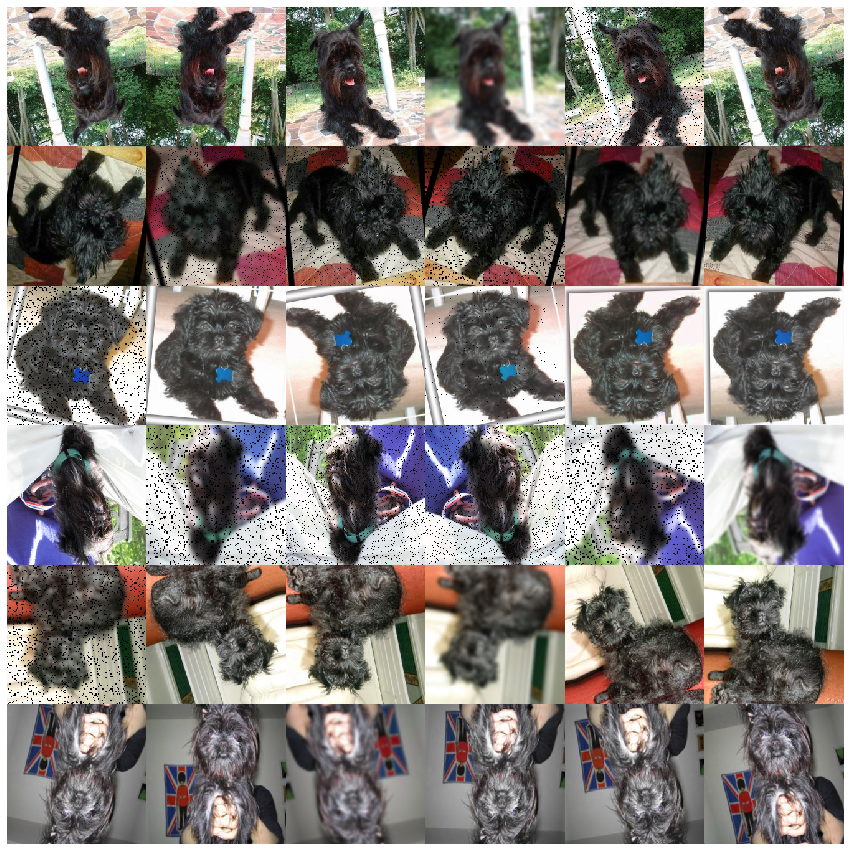

In [37]:


dataset = torchvision.datasets.ImageFolder('/content/dog_images/train', transform=transforms)

show_dataset(dataset)

In [38]:
import os
import torch
from torchvision import datasets
import torchvision.transforms as transforms
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

train_transforms = transforms.Compose([transforms.Resize(size=258),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.RandomRotation(10),
                                       transforms.CenterCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

mixed_transforms = torchvision.transforms.Compose([
    ImgAugTransform(),
    lambda x: PIL.Image.fromarray(x),
    torchvision.transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

valid_transforms = transforms.Compose([transforms.Resize(size=258),
                                           transforms.CenterCrop(224),
                                           transforms.ToTensor(),
                                           transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])


# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder('dog_images/train', transform=mixed_transforms)
valid_data = datasets.ImageFolder('dog_images/valid', transform=valid_transforms)
test_data = datasets.ImageFolder('dog_images/test', transform=valid_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True, num_workers=4)

validloader = torch.utils.data.DataLoader(valid_data, batch_size=64, shuffle=True, num_workers=4)

testloader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=False, num_workers=4)

loaders_scratch = {'train' : trainloader, 'valid' : validloader, 'test' : testloader}

ERROR! Session/line number was not unique in database. History logging moved to new session 59


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Function `Scale()` is deprecated. Use `Resize` instead. Resize has the exactly same interface as Scale.
  after removing the cwd from sys.path.


In [39]:
def find_classes(dir):
    classes = [d for d in os.listdir(dir) if os.path.isdir(os.path.join(dir, d))]
    classes.sort()
    class_to_idx = {classes[i]: i for i in range(len(classes))}
    return classes, class_to_idx

def class_names(dir):
    classes = [d for d in os.listdir(dir) if os.path.isdir(os.path.join(dir, d))]
    classes.sort()
    class_names_dict = {i : classes[i] for i in range(len(classes))}
    return class_names_dict

class_names_dict = class_names('dog_images/train')
print(class_names_dict)

{0: '001.Affenpinscher', 1: '002.Afghan_hound', 2: '003.Airedale_terrier', 3: '004.Akita', 4: '005.Alaskan_malamute', 5: '006.American_eskimo_dog', 6: '007.American_foxhound', 7: '008.American_staffordshire_terrier', 8: '009.American_water_spaniel', 9: '010.Anatolian_shepherd_dog', 10: '011.Australian_cattle_dog', 11: '012.Australian_shepherd', 12: '013.Australian_terrier', 13: '014.Basenji', 14: '015.Basset_hound', 15: '016.Beagle', 16: '017.Bearded_collie', 17: '018.Beauceron', 18: '019.Bedlington_terrier', 19: '020.Belgian_malinois', 20: '021.Belgian_sheepdog', 21: '022.Belgian_tervuren', 22: '023.Bernese_mountain_dog', 23: '024.Bichon_frise', 24: '025.Black_and_tan_coonhound', 25: '026.Black_russian_terrier', 26: '027.Bloodhound', 27: '028.Bluetick_coonhound', 28: '029.Border_collie', 29: '030.Border_terrier', 30: '031.Borzoi', 31: '032.Boston_terrier', 32: '033.Bouvier_des_flandres', 33: '034.Boxer', 34: '035.Boykin_spaniel', 35: '036.Briard', 36: '037.Brittany', 37: '038.Brussels

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


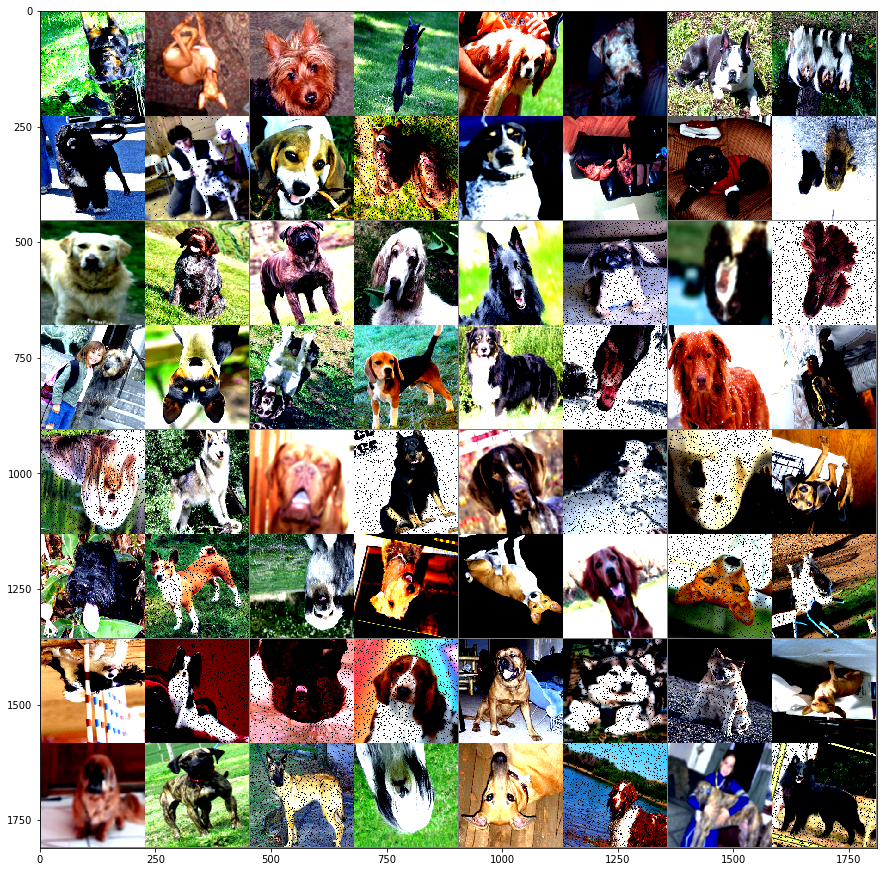

018.Beauceron 120.Pharaoh_hound 013.Australian_terrier 093.Kerry_blue_terrier 046.Cavalier_king_charles_spaniel 097.Lakeland_terrier 032.Boston_terrier 054.Collie 125.Portuguese_water_dog 057.Dalmatian
torch.Size([3, 224, 224])


In [40]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

def imshow(img):
    img = img / 2 + 0.5    
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' % class_names_dict[int(labels[j])] for j in range(10)))
print(images[0].size())

In [0]:
import numpy as np
import time



def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path, verbose=False):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    
    valid_loss_min = np.Inf 
    initial_time = time.time()
    train_losses, valid_losses = [], []
    
    for epoch in range(1, n_epochs+1):

        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        initial_epoch_time = time.time()
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            optimizer.zero_grad()
            log_ps = model(data)
            loss = criterion(log_ps, target)
            loss.backward()
            optimizer.step()
        
            #running_loss += train_loss.item()
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #A
        ######################
        model.eval()
        with torch.no_grad():
            for batch_idx, (data, target) in enumerate(loaders['valid']):
                # move to GPU
                if use_cuda:
                    data, target = data.cuda(), target.cuda()
                ## update the average validation loss

                ps_log = model(data)
                loss = criterion(ps_log, target)
                valid_loss = valid_loss + (1 / (batch_idx + 1)) * (loss.data - valid_loss)


                
            if verbose:
                final_epoch_time = time.time()
                print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f} \tTime spent: {:.6f}'.format(
                   epoch, 
                   train_loss,
                   valid_loss,
                   final_epoch_time - initial_epoch_time
                   ))            
        
        train_losses.append(train_loss)
        valid_losses.append(valid_loss)
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
           #print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,valid_loss))
           torch.save(model.state_dict(), save_path)
           valid_loss_min = valid_loss    
    # return trained model
    
    final_time = time.time()
    return model, train_losses, valid_losses, final_time - initial_time



In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import os
import torch
from torchvision import datasets
import torchvision.transforms as transforms
import torch.optim as optim
from PIL import ImageFile
import matplotlib.pyplot as plt
import datetime
import torch.nn as nn
import torch.nn.functional as F
ImageFile.LOAD_TRUNCATED_IMAGES = True


mixed_transforms = torchvision.transforms.Compose([
    ImgAugTransform(),
    lambda x: PIL.Image.fromarray(x),
    torchvision.transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

valid_transforms = transforms.Compose([transforms.Resize(size=258),
                                           transforms.CenterCrop(224),
                                           transforms.ToTensor(),
                                           transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])



train_data = datasets.ImageFolder('dog_images/train', transform=mixed_transforms)
valid_data = datasets.ImageFolder('dog_images/valid', transform=valid_transforms)
test_data = datasets.ImageFolder('dog_images/test', transform=valid_transforms)


trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True, num_workers=0)
validloader = torch.utils.data.DataLoader(valid_data, batch_size=64, shuffle=True, num_workers=0)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=False, num_workers=0)

loaders_scratch = {'train' : trainloader, 'valid' : validloader, 'test' : testloader}


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, stride=1, padding=1)
        self.batchn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 32, 3, stride=1, padding=1)
        self.batchn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 64, 3, stride=1, padding=1)
        self.batchn3 = nn.BatchNorm2d(64)
        self.conv4 = nn.Conv2d(64, 128, 3, stride=1, padding=1)
        self.batchn4 = nn.BatchNorm2d(128)
        self.fc1 = nn.Linear(128 * 14 * 14, 2048)
        self.fc2 = nn.Linear(2048, 1024)
        self.fc3 = nn.Linear(1024, 133)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(p=0.4)

    def forward(self, x):
        x = self.pool(F.relu(self.batchn1(self.conv1(x))))
        x = self.pool(F.relu(self.batchn2(self.conv2(x))))
        x = self.pool(F.relu(self.batchn3(self.conv3(x))))
        x = self.pool(F.relu(self.batchn4(self.conv4(x))))
        #Sprint(x.size())
        x = x.view(-1, 128 * 14 * 14)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.fc3(x)
        return x


model_scratch = Net()
print (model_scratch)

use_cuda = torch.cuda.is_available()
if use_cuda:
    model_scratch.cuda()

learning_rates = [
                 0.001
                 #0.0015,
                 #0.0025,
                 #0.0035

                 ]

optimizers = [
                #optim.Adagrad,
                optim.Adam
            ]


def test(loaders, model, criterion, use_cuda):
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        output = model(data)
        loss = criterion(output, target)
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        pred = output.data.max(1, keepdim=True)[1]
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
    print('Test Loss: {:.6f}'.format(test_loss))
    print('\nTest Accuracy: %2d%% (%2d/%2d)\n\n' % (
        100. * correct / total, correct, total))

def weights_init(m):
    if isinstance(m, nn.Conv2d):
        torch.nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            torch.nn.init.zeros_(m.bias)

def reboot(loaders, model, criterion):
    del loaders
    del model
    del criterion
    torch.cuda.empty_cache()
    
    trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True, num_workers=0)
    validloader = torch.utils.data.DataLoader(valid_data, batch_size=64, shuffle=True, num_workers=0)
    testloader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=False, num_workers=0)
    
    new_model = Net()
    new_model.apply(weights_init)
    new_model.cuda()
    
    new_criterion = criterion_scratch = nn.CrossEntropyLoss()
    
    return {'train' : trainloader, 'valid' : validloader, 'test' : testloader}, new_model, new_criterion

current_optimizer = ''
model_scratch = ''
criterion_scratch = ''
for optimizer in optimizers:
    for lr in learning_rates:
        loaders_scratch, model_scratch, criterion_scratch = reboot(loaders_scratch, model_scratch, criterion_scratch)
        del current_optimizer
        current_optimizer = optimizer(model_scratch.parameters(), lr)
        
        print(current_optimizer)
        model, train_losses, valid_losses, time_spent = train(100, loaders_scratch, 
                                                              model_scratch, 
                                                              current_optimizer, 
                                                              criterion_scratch, 
                                                              use_cuda, 
                                                              'model_scratch.pt',
                                                              verbose=True)
        
        print("time spent: ", str(datetime.timedelta(seconds=time_spent)))
        
        min_train_loss = float(min(train_losses))
        min_valid_loss = float(min(valid_losses))
        
        print("Minimum trainig loss: ", min_train_loss)
        print("Minimum validation loss: ", min_valid_loss)

        plt.plot(train_losses, label='Training loss')
        plt.plot(valid_losses, label='Validation loss')
        
        plt.legend(frameon=False)
        plt.show()
       
        model_scratch.load_state_dict(torch.load('model_scratch.pt'))
        test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)
        


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Function `Scale()` is deprecated. Use `Resize` instead. Resize has the exactly same interface as Scale.
  after removing the cwd from sys.path.


Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=25088, out_features=2048, bias=True)
  (fc2): Linear(in_features=2048, out_features=1024, bias=True)
  (fc3): Linear(in_features=1024, out_features=133, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.4, inplace=F